<a href="https://colab.research.google.com/github/harikagirigari/Big-data-lab/blob/main/BD_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 Rows:
   OrderID                 Date   Region     Category SubCategory  Sales  \
0        1  2024-01-01 00:00:00     West     Clothing      Mobile   5227   
1        2  2024-01-01 01:00:00  Central        Books       Table   9098   
2        3  2024-01-01 02:00:00     East  Electronics      Laptop   2822   
3        4  2024-01-01 03:00:00  Central        Books       Chair   4756   
4        5  2024-01-01 04:00:00  Central    Furniture      Laptop   1425   

   Profit  Quantity CustomerType  PaymentMode  
0    2636        33    Returning  Credit Card  
1    2948        23          New       Wallet  
2    -460        13          New         Cash  
3      42        49          VIP          UPI  
4    -186        14          VIP         Cash  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       3000 non-null   

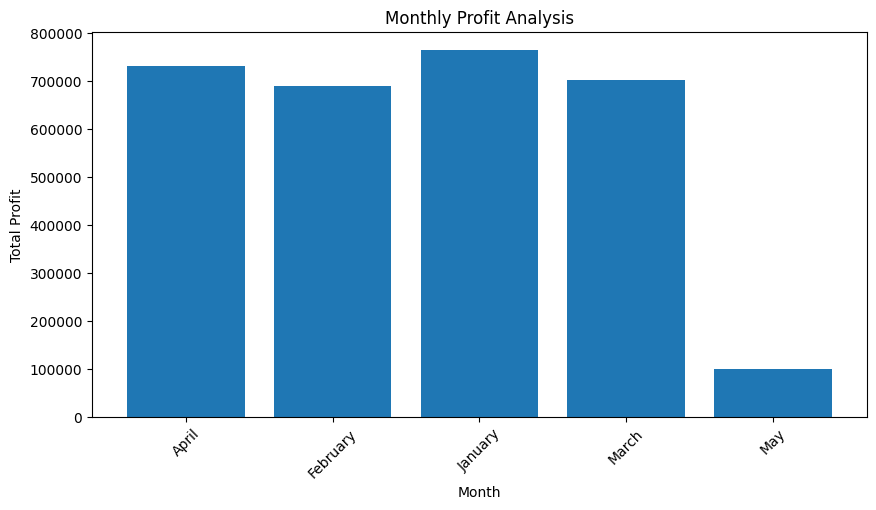

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/large_sales_data (1).csv"
df = pd.read_csv(file_path)

print("First 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month_name()

print("\nDescriptive Statistics:")
print(df.describe())

monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()

print("\nMonthly Profit:")
print(monthly_profit)

highest_profit_month = monthly_profit.loc[monthly_profit['Profit'].idxmax()]

print("\nMonth with Highest Profit:")
print(highest_profit_month)

plt.figure(figsize=(10,5))
plt.bar(monthly_profit['Month'], monthly_profit['Profit'])
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Analysis')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#DIAGNOSTIC ANALYSIS

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()

highest_profit_month = monthly_profit.loc[monthly_profit['Profit'].idxmax()]
print("Month with Highest Profit:")
print(highest_profit_month)

top_month = highest_profit_month['Month']

Month with Highest Profit:
Month     January
Profit     763909
Name: 2, dtype: object


In [ ]:
top_month_data = df[df['Month'] == top_month]

      Category  Profit
0        Books  155983
1     Clothing  167672
2  Electronics  149904
3         Food  175819
4    Furniture  114531


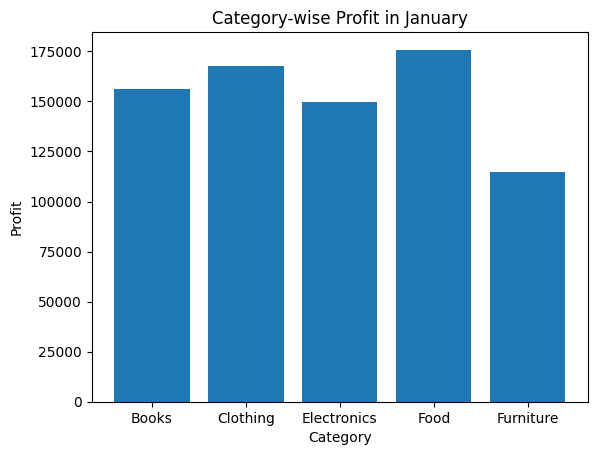

In [ ]:
category_profit = top_month_data.groupby('Category')['Profit'].sum().reset_index()
print(category_profit)

plt.figure()
plt.bar(category_profit['Category'], category_profit['Profit'])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title(f'Category-wise Profit in {top_month}')
plt.show()

    Region  Profit
0  Central  148052
1     East  154643
2    North  156207
3    South  139735
4     West  165272


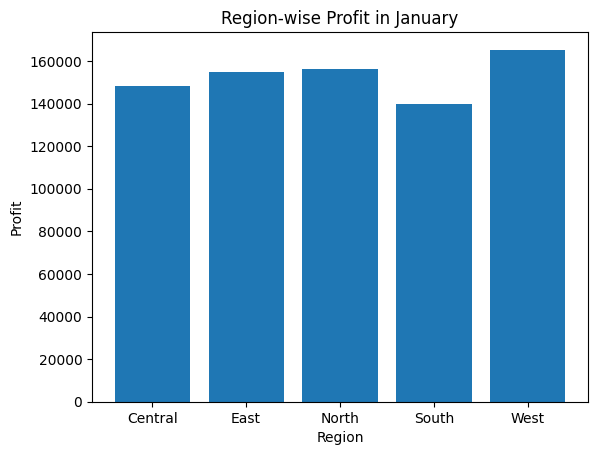

In [ ]:
region_profit = top_month_data.groupby('Region')['Profit'].sum().reset_index()
print(region_profit)

plt.figure()
plt.bar(region_profit['Region'], region_profit['Profit'])
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title(f'Region-wise Profit in {top_month}')
plt.show()

In [ ]:
subcategory_profit = top_month_data.groupby('SubCategory')['Profit'].sum().sort_values(ascending=False)
print(subcategory_profit.head(10))

SubCategory
Laptop    118397
Shirt     104385
Pants      98620
Novels     97091
Snacks     92351
Mobile     91136
Table      86188
Chair      75741
Name: Profit, dtype: int64


In [ ]:
#PREDICTIVE ANALYSIS

In [ ]:
import pandas as pd

file_path = "/content/large_sales_data (1).csv"
df = pd.read_csv(file_path)

X = df[['Sales', 'Quantity']]
y = df['Profit']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

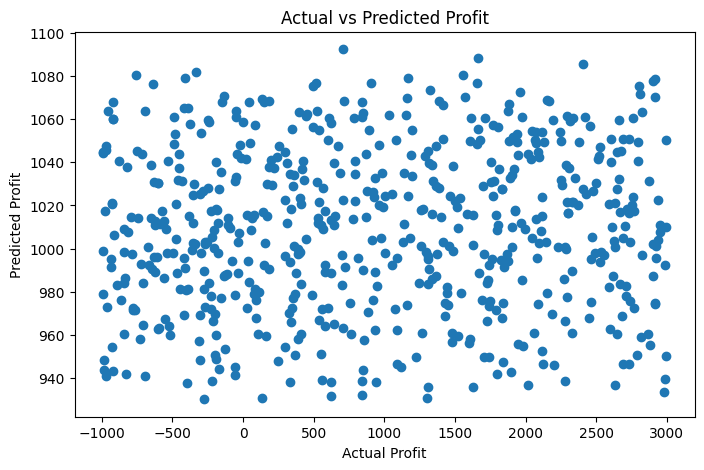

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()